<a href="https://colab.research.google.com/github/Farhanmohamedkn/Reinforcement_Learning/blob/master/Reinforcement_Learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q-learning

What is open AI gym?

In [1]:
import gym

usinf gym gym you can load an enviornment using the line gym.make("enviornment").

In [2]:
env = gym.make('FrozenLake-v1',render_mode='human')  # we are going to use the FrozenLake enviornment
new_step_api=True # old version depricated

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
print(env.observation_space.n)   # get number of states for the agent in the nevironment
print(env.action_space.n)   # get number of actions we can in any state

16
4


In [4]:
env.reset()  # reset enviornment to default state

0

In [5]:
action = env.action_space.sample()  # get a random action for the agent form the action space

In [6]:
new_state, reward, done, info = env.step(action)  # take action, observe the environment it returns information about the action
#if Done is false agent is cant move anymore we have to resest the environment and start again

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [7]:
env.render()   # render the GUI for the enviornment

# What is frozen lake environment?

The enviornment we loaded above FrozenLake-v0 is one of the simplest enviornments in Open AI Gym. The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the enviornment above to see an example).

There are:

16 states (one for each square)
4 possible actions (LEFT, RIGHT, DOWN, UP)
4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

In [8]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
new_step_api=True #depricated in current version
STATES = env.observation_space.n # no of states
ACTIONS = env.action_space.n # no of actions

In [9]:
Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values for the Q table
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Lets define some constant needed for the qlearning algorithm or equation

In [10]:
EPISODES = 2000 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each agent to  run in the enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96 #discount factor

# How to pick an action?
Remember that we can pick an action using one of two methods:

1.Randomly picking a valid action

2.Using the current Q-Table to find the best action.

Here we will define a new value  ϵ  that will tell us the probabillity of selecting a random action. This value will start off very high and slowly decrease as the agent learns more about the enviornment

In [11]:
epsilon = 0.9  # start with a 90% chance of picking a random action

# code to pick action (pick a random number between 0 and 1--> np.random.uniform(0, 1) )
if np.random.uniform(0, 1) < epsilon:  # we will check if a randomly selected value is less than epsilon.
    action = env.action_space.sample()  # take random action
else:
    action = np.argmax(Q[state, :])  # use Q table to pick best action based on current values

###Updating Q Values
implements the formula.

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

# Lets put it all together
where is the neural network??

In [15]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')

STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [16]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :]) # use Q table to pick best action based on current values

    next_state, reward, done, _ = env.step(action) # this '-' is used if you dont want that return value from the function

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001 #reduce a little bit every time so it can take action from the q table instead of random
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[1.01303520e-02 2.38186746e-01 9.91627915e-03 9.69979320e-03]
 [3.06653588e-03 4.87508925e-03 2.26192974e-03 6.87580675e-02]
 [2.03379816e-03 3.83400007e-03 4.80107157e-03 2.94913400e-02]
 [2.67345470e-03 2.55561311e-03 7.94845112e-04 1.53528619e-02]
 [3.21055925e-01 4.24853077e-03 4.67180178e-03 7.96953534e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.14757443e-05 1.59945930e-07 1.20447102e-02 4.39842088e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.22882893e-03 2.50604789e-03 3.88665137e-03 1.89017464e-01]
 [2.86285003e-03 4.68250952e-01 4.76016320e-03 5.87818334e-03]
 [5.40748815e-02 6.49032739e-04 4.81882822e-04 5.21214551e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.51576712e-02 1.28290514e-01 7.57054431e-01 2.54955096e-02]
 [1.65418522e-01 9.72441618e-01 2.05201563e-01 1.91367714e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

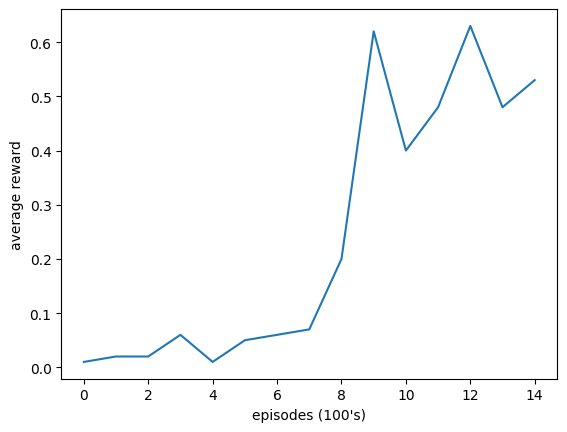

In [17]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()